## Gender Recognition Neural Network:

In this notebook, we are going to practice handling 3 dimensional data, specifically, computer vision. In the data file, there are two further files, in which there are photos of men and women. Note that the images are cropped. In total, we have approximately 57,000 images: ~23,000 training images of each class and ~5,500 testing images of each class.

We are going to design a convolutional neural network that can distinguish the two sexes.

The requisite steps:
- Import the data
- standardise the data
- Shuffling the data
- Creating the model
- Fine-tuning the model
- Testing the model

## Importing necessary modules:

In [8]:
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib.image import imread

import tensorflow as tf
from tensorflow import keras
from keras import layers, models, initializers
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img, image_dataset_from_directory

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from IPython.display import Image

import os
import random

## What our dataset looks like:

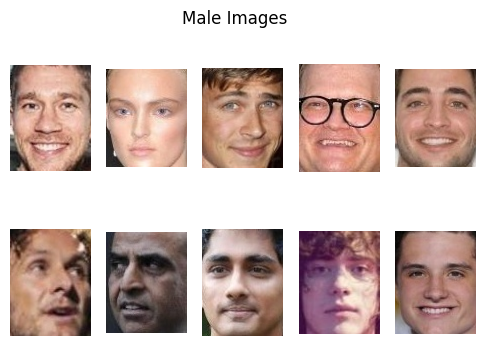

In [25]:
train_path = '../data/Training'
test_path = '..data/Testing'

plt.figure(dpi = 100)
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.suptitle('Male Images')
    image_path = random.choice(os.listdir(train_path + '/male'))
    image = load_img(train_path + '/male/' + image_path)
    plt.axis ('off')
    plt.imshow(image)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=76x104 at 0x7FE2508748B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=83x106 at 0x7FE250A5E730>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=89x117 at 0x7FE24F5D0250>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=73x106 at 0x7FE250D9DA00>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=84x119 at 0x7FE250734520>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=84x102 at 0x7FE250F25CD0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=69x106 at 0x7FE251251820>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=82x107 at 0x7FE2511B7C40>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=85x112 at 0x7FE250EDEF70>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=84x109 at 0x7FE25090AA30>


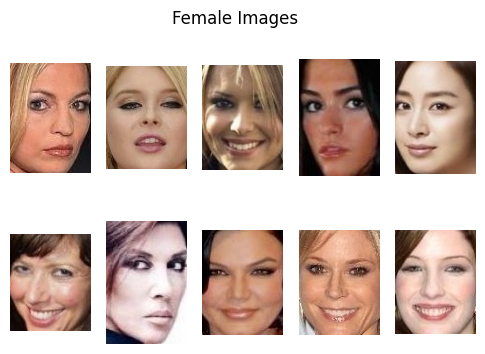

In [37]:
plt.figure(dpi = 100)
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.suptitle('Female Images')
    image_path = random.choice(os.listdir(train_path + '/female'))
    image = load_img(train_path + '/female/' + image_path)
    plt.axis ('off')
    plt.imshow(image)


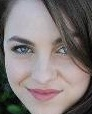

In [47]:
image = load_img('../data/Training/female/131422.jpg.jpg') 
image

In [48]:
print(type(image), image.format, image.mode, image.size)

<class 'PIL.JpegImagePlugin.JpegImageFile'> JPEG RGB (92, 114)


In [49]:
array = img_to_array(image)
array.shape

(114, 92, 3)

## Importing the entire data set:

In [56]:
train_set = image_dataset_from_directory('../data/Training', label_mode =  'binary', image_size = (130, 130), batch_size = 64)
test_set = image_dataset_from_directory('../data/Testing', label_mode =  'binary', image_size = (130, 130), batch_size = 64)

Found 47009 files belonging to 2 classes.
Found 11649 files belonging to 2 classes.


['female', 'male']

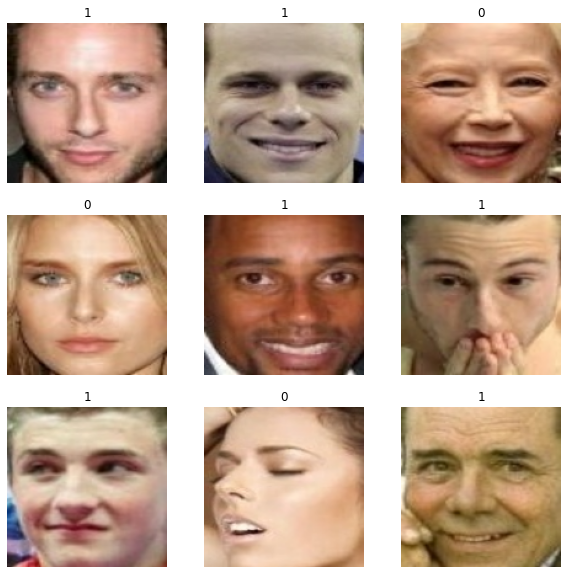

In [57]:
plt.figure(figsize=(10, 10))
for images, labels in train_set.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [63]:
print(train_set.class_names)

['female', 'male'] <function DatasetV2.zip at 0x7fe26846de50>


In [76]:
kernel_size=(3,3) # The size of kernel

model = models.Sequential(
    [
        layers.Rescaling(1.0/255),    
        layers.Conv2D(32, kernel_size, input_shape = (130, 130, 3), padding="same", activation = 'relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(64, kernel_size, activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(128, kernel_size, activation='relu'),        
        layers.Flatten(),
        layers.Dense(256, activation="relu"),  
        layers.Dense(1, activation="sigmoid")
    ]
)
optimizer = keras.optimizers.Adam(learning_rate = 0.01)
model.compile(loss = keras.losses.BinaryCrossentropy(), optimizer=optimizer, metrics=['accuracy'])
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [77]:
history = model.fit(train_set, validation_data = test_set, epochs=1)

 38/735 [>.............................] - ETA: 9:46 - loss: 5.8209 - accuracy: 0.4951